In [178]:
%matplotlib inline
import matplotlib.pyplot as plt

In [179]:
import numpy as np
import pymssql
import pandas as pd

In [130]:
DBConnection = pymssql.connect(user="LSST-2", password="L$$TUser", database="LSSTCATSIM", port='51433')

In [131]:
db = DBConnection.cursor()

In [5]:
def get_colnames(db, tableName, colNamePos=3, colList=range(7)):
    """
    return the colNames in the table by reading the schema.
    
    Parameters
    ----------
    db : database Connection cursor, mandatory
        cursor opened to the database in which the table is located
    tableName : string, mandatory
        Name of the table,
    colNamePos : integer, optional, defaults to 3
        The hierarchy of cols
    colList : List of integers, optional, defaults to range(7)
        indexes corresponding to the desired columns
    """
    query = """select * from information_schema.columns where table_name = '{0}'""".format(tableName)
    db.execute(query)
    x = db.fetchall()
    x = np.array([xx[colNamePos] for xx in x])
    
    if colList is None:
        return x
    return x[colList]

def get_table(db, tableName, colnames=None, index='id'):
    """
    
    """
    if colnames is None:
        colNames = get_colnames(db, tableName)
    
    cols = ", ".join(colnames)
    query = """SELECT {0} FROM [LSSTCATSIM].[dbo].[{1}]""".format(cols, tableName)
    print(query)
    db.execute(query)
    x = db.fetchall()
    df = pd.DataFrame.from_records(x, columns=colnames, index=index)
    return df

In [6]:
cols = get_colnames(db, 'tiles', colList=range(7))

In [7]:
galTiles = get_table(db, 'tiles', colnames=cols)#.apply(np.radians)
galTiles['decMidRad'] = np.radians( -galTiles['decmid'] + 90.)
delta = np.radians(2.)
galTiles['area'] = 2* delta * np.sin(delta) * np.sin(galTiles.decMidRad)

SELECT id, llx, lly, urx, ury, ramid, decmid FROM [LSSTCATSIM].[dbo].[tiles]


In [8]:
galTiles.query('abs(ramid - 53.009) < 5 and abs(decmid + 27.439) < 5 ')

,llx,lly,urx,ury,ramid,decmid,decMidRad,area
id,,,,,,,,
554,48,-34,52,-30,50,-32,2.129302,0.002066
555,48,-30,52,-26,50,-28,2.059489,0.002151
556,48,-26,52,-22,50,-24,1.989675,0.002226
599,52,-34,56,-30,54,-32,2.129302,0.002066
600,52,-30,56,-26,54,-28,2.059489,0.002151
601,52,-26,56,-22,54,-24,1.989675,0.002226
644,56,-34,60,-30,58,-32,2.129302,0.002066
645,56,-30,60,-26,58,-28,2.059489,0.002151
646,56,-26,60,-22,58,-24,1.989675,0.002226


In [9]:
from lsst.sims.catUtils.Ga

SyntaxError: invalid syntax (<ipython-input-9-f0e10433ab90>, line 1)

In [10]:
galTiles.area

id
0       0.000085
1       0.000255
2       0.000423
3       0.000589
4       0.000753
5       0.000913
6       0.001068
7       0.001218
8       0.001362
9       0.001500
10      0.001630
11      0.001753
12      0.001866
13      0.001971
14      0.002066
15      0.002151
16      0.002226
17      0.002290
18      0.002342
19      0.002383
20      0.002413
21      0.002431
22      0.002436
23      0.002431
24      0.002413
25      0.002383
26      0.002342
27      0.002290
28      0.002226
29      0.002151
          ...   
4045    0.000753
4046    0.000589
4047    0.000423
4048    0.000255
2115    0.000085
2160    0.000085
2475    0.000085
2519    0.000085
2655    0.000085
2835    0.000085
3015    0.000085
3060    0.000085
3285    0.000085
3330    0.000085
3509    0.000085
3554    0.000085
3824    0.000085
3915    0.000085
3960    0.000085
4004    0.000085
4049    0.000085
360     0.000085
405     0.000085
675     0.000085
720     0.000085
765     0.000085
945     0.000085
990     0.0

In [11]:
def galTileArea(galTiles, id):
    TwinklesObsMetaData = ObservationMetaData(boundType='box',pointingRA=centralRA,pointingDec=centralDec,
                                              boundLength=patchRadius, mjd=49540.0)
    

In [12]:
galTiles.ramid.describe()

count    4050.000000
mean      180.000000
std       103.929465
min         2.000000
25%        90.000000
50%       180.000000
75%       270.000000
max       358.000000
Name: ramid, dtype: float64

In [9]:
delta = np.radians(2)

In [10]:
galTiles['decMidRad'] = np.radians( -galTiles['decmid'] + 90.)

In [11]:
galTiles['area'] = 2* delta * np.sin(delta) * np.sin(galTiles.decMidRad)

In [12]:
galTiles

,llx,lly,urx,ury,ramid,decmid,decMidRad,area
id,,,,,,,,
0,0,-90,4,-86,2,-88,3.106686,0.000085
1,0,-86,4,-82,2,-84,3.036873,0.000255
2,0,-82,4,-78,2,-80,2.967060,0.000423
3,0,-78,4,-74,2,-76,2.897247,0.000589
4,0,-74,4,-70,2,-72,2.827433,0.000753
5,0,-70,4,-66,2,-68,2.757620,0.000913
6,0,-66,4,-62,2,-64,2.687807,0.001068
7,0,-62,4,-58,2,-60,2.617994,0.001218
8,0,-58,4,-54,2,-56,2.548181,0.001362


## Galaxies

In [11]:
from lsst.sims.catalogs.measures.instance import InstanceCatalog
import lsst.sims.catUtils.baseCatalogModels as bcm
from lsst.sims.catalogs.generation.db import CatalogDBObject
from lsst.sims.catUtils.baseCatalogModels.GalaxyModels import GalaxyTileObj
from lsst.sims.utils import ObservationMetaData

/Users/rbiswas/src/LSST/sims_catalogs_generation/python/lsst/sims/catalogs/generation/db/dbConnection.py:438: UserWarning: Duplicate object type id 25 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
  'want globally unique id values')
/Users/rbiswas/src/LSST/sims_catalogs_generation/python/lsst/sims/catalogs/generation/db/dbConnection.py:438: UserWarning: Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
  'want globally unique id values')


In [109]:
def tileObsMetaData(id, galTileDF):
    """
    """
    ra = galTileDF.ix[id, 'ramid']
    dec = galTileDF.ix[id, 'decmid']
    obsMetaData = ObservationMetaData(boundType='circle',
                                      pointingRA=ra,
                                      pointingDec=0.,
                                      boundLength=2.)
    return obsMetaData
    

In [115]:
obsMetaData_base = tileObsMetaData(22, galTiles)

In [116]:
print obsMetaData_base.pointingRA

2.0


In [15]:
galCols = get_colnames(db, 'galaxy', colNamePos=3, colList=None)

In [16]:
print galCols

[u'htmid' u'galid' u'ra' u'dec' u'redshift' u'rad_vel' u'u_ab' u'g_ab'
 u'r_ab' u'i_ab' u'z_ab' u'y_ab' u'sedid_bulge' u'sedid_disk' u'sedid_agn'
 u'av_b' u'rv_b' u'ext_model_b' u'av_d' u'rv_d' u'ext_model_d' u'glon'
 u'glat' u'pa_bulge' u'pa_disk' u'inc_bulge_deg' u'inc_disk_deg' u'a_b'
 u'b_b' u'bulge_n' u'bra' u'bdec' u'a_d' u'b_d' u'disk_n' u'dra' u'ddec'
 u'agnra' u'agndec' u'versionid' u'fluxnorm_bulge' u'fluxnorm_agn'
 u'absmag_r_total' u'gal_type' u'mass_stellar' u'mass_gas' u'mass_halo'
 u'ug_total_rest' u'gr_total_rest' u'ri_total_rest' u'iz_total_rest'
 u'zy_total_rest' u'isagn' u'agn_tau' u'agn_sfu' u'agn_sfg' u'agn_sfr'
 u'agn_sfi' u'agn_sfz' u'agn_sfy' u'fluxnorm_disk' u'magnorm_bulge'
 u'magnorm_disk' u'magnorm_agn' u'cx' u'cy' u'cz' u'geopoint'
 u'sedname_agn' u'sedname_bulge' u'sedname_disk' u'varsimobjid'
 u'varParamStr' u'type' u'mass_bulge' u'BulgeMinusDiskLSSTr'
 u'log10BulgeToTotLSSTrFlux' u'AbsiMag' u'AbsiMag0_1' u'z0_1umg' u'z0_1gmr'
 u'z0_1rmi' u'z0_1imz' u'z0_

In [51]:
class galCopy(InstanceCatalog):
    column_outputs = ['galtileid', 'raJ2000', 'decJ2000', 'redshift', 'a_d', 'b_d', 'pa_disk', 'mass_stellar', 'absmag_r_total']
    override_formats = {'raJ2000': '%8e', 'decJ2000': '%8e', 'a_d': '%8e', 'b_d': '%8e', 'pa_disk': '%8e', 
                        'mass_stellar': '%8e', 'absmag_r_total': '%8e'}

ValueError: Catalog Type gal_copy is duplicated

In [111]:
galaxyTiled = GalaxyTileObj()
galaxyBase = galCopy(galaxyTiled, obs_metadata=obsMetaData_base, constraint='redshift < 0.1')

In [112]:
obsMetaData_base.boundLength

2.0

In [113]:
galaxyBase.write_catalog('galaxyBase.csv')

In [114]:
!wc -l galaxyBase.csv

   17317 galaxyBase.csv


In [117]:
df = pd.read_csv('galaxyBase.csv', delimiter=', ')
df.rename(columns={df.columns[0]: df.columns[0][1:]}, inplace=True)
df.set_index('galtileid', inplace=True)

/usr/local/manual/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [118]:
x = df.raJ2000.values
df['ra'] = np.piecewise(x, [x < 3., x >= 3], [lambda x: x, lambda x: x - 2.*np.pi])

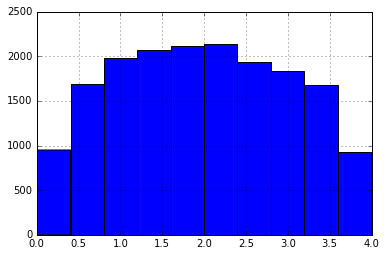

In [119]:
df.raJ2000.apply(np.degrees).hist()

In [106]:
np.degrees(np.array([df.raJ2000.max(), df.raJ2000.min()]))

array([  3.59995399e+02,   1.57587744e-02])

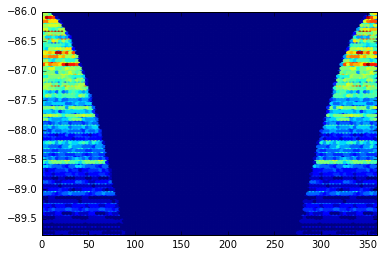

In [108]:
plt.hexbin(df.raJ2000.apply(np.degrees), df.decJ2000.apply(np.degrees))

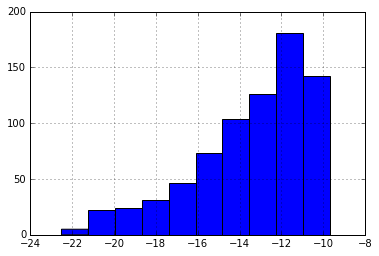

In [59]:
df.query('redshift < 0.1').absmag_r_total.hist()

In [40]:
df.head()

,raJ2000,decJ2000,redshift,a_d,b_d,pa_disk,mass_stellar,absmag_r_total
galtileid,,,,,,,,
5380221,0.049738,-1.536042,1.1504,0.124971,0.036424,158.652800,0.388559,-20.39482
8745607,0.043380,-1.536014,1.1489,0.471920,0.286231,0.621346,0.062399,-18.91214
16752290,0.044144,-1.536021,1.1434,0.112597,0.069222,319.529600,0.000560,-15.63990
13551312,0.046477,-1.536098,1.1335,0.126130,0.080879,259.151500,0.026038,-17.90116
5401314,0.051571,-1.536053,1.1591,0.182993,0.092681,226.913200,0.166675,-19.67984


In [97]:
%matplotlib inline
import matplotlib.pyplot as plt

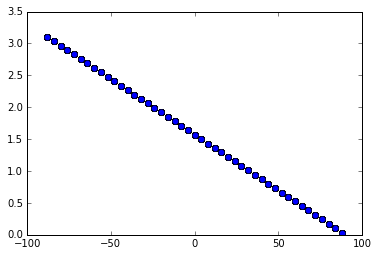

In [110]:
plt.plot(galTiles.decmid, galTiles.decMidRad, 'o')

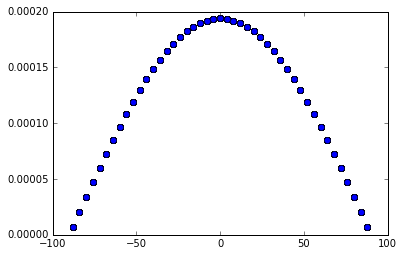

In [115]:
plt.plot(galTiles.decmid, galTiles.area/np.pi /4., 'o')

In [103]:
np.radians(2)

0.034906585039886591

In [155]:
galTiles.query('abs(ramid-53) < 5 and abs(decmid+27.4) < 5')

,llx,lly,urx,ury,ramid,decmid,area,decMidRad
id,,,,,,,,
554,48,-34,52,-30,50,-32,0.002066,2.129302
555,48,-30,52,-26,50,-28,0.002151,2.059489
556,48,-26,52,-22,50,-24,0.002226,1.989675
599,52,-34,56,-30,54,-32,0.002066,2.129302
600,52,-30,56,-26,54,-28,0.002151,2.059489
601,52,-26,56,-22,54,-24,0.002226,1.989675


In [42]:
galTiles['obsMetaData'] = tileObsMetaData(id, galTiles)

KeyError: <built-in function id>

In [49]:
tileObsMetaData(600, galTiles)

In [ ]:
ObservationMetaData()


In [41]:
obsMeta = tileObsMetaData(600, galTiles)

In [ ]:
from lsst.sims.catUtils.

In [165]:
galaxyTiled  = GalaxyTileObj()

/usr/local/manual/anaconda/lib/python2.7/site-packages/sqlalchemy/dialects/mssql/base.py:1294: SAWarning: Did not recognize type 'geography' of column 'geopoint'
  return fn(*arg, **kw)


In [168]:
TwinklesGalaxies = galCopy(galaxyTiled, obs_metadata=obsMeta, constraint='mass_stellar')

In [191]:
import time

In [192]:
tstart = time.time()
TwinklesGalaxies.write_catalog('TwinkGals.dat')
tend = time.time()
print(tend - tstart)

734.053437948


In [193]:
!wc -l TwinkGals.dat 

 12148154 TwinkGals.dat


In [172]:
12148154 / 1e6

12.148154

In [189]:
query = """SELECT galtileid, raJ2000, decJ2000, redshift, a_d, b_d, pa_disk  FROM [LSSTCATSIM].[dbo].[galaxy]"""

In [184]:
query = """SELECT count(*)  FROM [LSSTCATSIM].[dbo].[galaxyBase]"""

In [186]:
query = """SELECT table_name FROM information_schema.tables"""

In [190]:
db.execute(query)

ProgrammingError: (207, "Invalid column name 'galtileid'.DB-Lib error message 20018, severity 16:\nGeneral SQL Server error: Check messages from the SQL Server\nDB-Lib error message 20018, severity 16:\nGeneral SQL Server error: Check messages from the SQL Server\nDB-Lib error message 20018, severity 16:\nGeneral SQL Server error: Check messages from the SQL Server\n")

In [188]:
db.fetchall()

[(u'StarMLT',),
 (u'StarMLTForceseek',),
 (u'galaxy_agn',),
 (u'StarAllForceseek',),
 (u'galaxy_bulge',),
 (u'StarAll',),
 (u'StarMSRGB',),
 (u'StarMSRGBForceseek',),
 (u'StarDwarfGalaxy',),
 (u'stars_mlt_part_1180',),
 (u'tiles',),
 (u'docColumnDescriptions',),
 (u'TwinkSN',),
 (u'galaxy_disk',),
 (u'stars_mlt_part_1220',),
 (u'docItems',),
 (u'SNStaging',),
 (u'stars_obafgk_part_1220',),
 (u'SNKrakenStaging',),
 (u'TwinkSNKraken',),
 (u'starsCenteredp80m10',),
 (u'density_map_pivot_starsMSRGB',),
 (u'ra_center_map_pivot_starsMSRGB',),
 (u'output_opsim3_61',),
 (u'decl_center_map_pivot_starsMSRGB',),
 (u'mltNameTable',),
 (u'MLTlookup',),
 (u'stars_partition_8700000000000_circle80m10',),
 (u'stars_mlt_part_1250',),
 (u'starsMSRGBp80m10',),
 (u'stars_obafgk_part_1250',),
 (u'gizisNameTable',),
 (u'starsMSRGBp80m10_forceseek',),
 (u'MLTfitTestTable',),
 (u'easterEggsFit',),
 (u'density_map_pivot_starsWD',),
 (u'sfdAstromEasterEggs',),
 (u'decl_center_map_pivot_starsWD',),
 (u'ra_center_

In [159]:
print(obsMeta.boundLength)

2.0


In [86]:
obsMetaData = ObservationMetaData(boundType='box',pointingRA=,pointingDec=centralDec,
                                              boundLength=2, mjd=49540.0)
    

NameError: name 'centralRA' is not defined

In [78]:
map(np.degrees, (0.925184, -0.4789))

[53.009138473031555, -27.438948808815123]

In [59]:
x = get_colnames(db, 'tiles', colList=range(7))

In [48]:
type(x)

numpy.ndarray

In [60]:
x

array([u'id', u'llx', u'lly', u'urx', u'ury', u'ramid', u'decmid'], 
      dtype='<U10')

In [ ]:
def get_table(db, colnames):
    """SELECT TOP 10 id, llx, lly, urx, ury, ramid, decmid  FROM [LSSTCATSIM].[dbo].[tiles]"""
    

In [177]:
query = """SELECT TOP 10 id, llx, lly, urx, ury, ramid, decmid  FROM [LSSTCATSIM].[dbo].[tiles]"""

In [178]:
db.execute(query)

In [179]:
db.fetchall()

[(0, 0.0, -90.0, 4.0, -86.0, 2.0, -88.0),
 (1, 0.0, -86.0, 4.0, -82.0, 2.0, -84.0),
 (2, 0.0, -82.0, 4.0, -78.0, 2.0, -80.0),
 (3, 0.0, -78.0, 4.0, -74.0, 2.0, -76.0),
 (4, 0.0, -74.0, 4.0, -70.0, 2.0, -72.0),
 (5, 0.0, -70.0, 4.0, -66.0, 2.0, -68.0),
 (6, 0.0, -66.0, 4.0, -62.0, 2.0, -64.0),
 (7, 0.0, -62.0, 4.0, -58.0, 2.0, -60.0),
 (8, 0.0, -58.0, 4.0, -54.0, 2.0, -56.0),
 (9, 0.0, -54.0, 4.0, -50.0, 2.0, -52.0)]

In [ ]:
query  = """SELECT t.name AS table_name FROM """

In [22]:
query = """SELECT t.COLUMNS from tiles as t"""

In [24]:
query = """select * from information_schema.columns where table_name = 'tiles'"""

In [25]:
db.execute(query)

In [26]:
db.fetchall()

[(u'LSSTCATSIM',
  u'dbo',
  u'tiles',
  u'id',
  1,
  None,
  u'YES',
  u'int',
  None,
  None,
  10,
  10,
  0,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None),
 (u'LSSTCATSIM',
  u'dbo',
  u'tiles',
  u'llx',
  2,
  None,
  u'YES',
  u'float',
  None,
  None,
  53,
  2,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None),
 (u'LSSTCATSIM',
  u'dbo',
  u'tiles',
  u'lly',
  3,
  None,
  u'YES',
  u'float',
  None,
  None,
  53,
  2,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None),
 (u'LSSTCATSIM',
  u'dbo',
  u'tiles',
  u'urx',
  4,
  None,
  u'YES',
  u'float',
  None,
  None,
  53,
  2,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None),
 (u'LSSTCATSIM',
  u'dbo',
  u'tiles',
  u'ury',
  5,
  None,
  u'YES',
  u'float',
  None,
  None,
  53,
  2,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None),
 (u'L

In [116]:
import joblib

In [133]:
%%timeit 
joblib.dump(galTiles, 'galTile')
gg = joblib.load('galTile')

100 loops, best of 3: 5.84 ms per loop


In [137]:
import cPickle as pickle

In [140]:
%%timeit 
gT = pickle.pickle
#gg = pickle.loads('galTile')

10 loops, best of 3: 22.2 ms per loop


TypeError: an integer is required

## probTable

In [5]:
query = """SELECT MAX(*) FROM (SELECT ra, dec, mass_stellar, redshift FROM galaxy) g"""


In [6]:
# get numGals
query = """SELECT  COUNT(*) FROM galaxy WHERE redshift < 1.4"""
db.execute(query)
numGals = db.fetchall()[0][0]

In [7]:
# Input 
numBins = 28

In [8]:
from __future__ import division

In [9]:
numGals
numGalsperBin = np.round(numGals / numBins)

In [10]:
numGalsperBin

323835.0

In [155]:
lowz = 0.
highz = 0.4

def nextz(db, lowz, highz, numBins=28, maxz=1.4, minz=0.):
    
    
    query = """SELECT  COUNT(*) FROM galaxy WHERE redshift < {0}""".format(maxz)
    db.execute(query)
    numGals = db.fetchall()[0][0]
    numGalsperBin = int(np.round(numGals / numBins))
    
    print('numGalsperBin', numGalsperBin)
    query = """SELECT TOP {0} id, redshift FROM galaxy WHERE REDSHIFT < {1} AND REDSHIFT > {2} ORDER BY REDSHIFT """\
        .format(numGalsperBin, highz, lowz)
    print(query)
    db.execute(query)
    x = db.fetchall()
    return x

In [147]:
#lowzh = pd.DataFrame.from_records(nextz(db, 0., 0.4))
highz = lowz + 0.25

In [148]:
lowz = nextz(db, lowz, highz)

('numGalsperBin', 323835)
SELECT TOP 323835 id, redshift FROM galaxy WHERE REDSHIFT < 0.495504304767 AND REDSHIFT > 0.245504304767 ORDER BY REDSHIFT 


In [149]:
print lowz

0.310272693634


In [160]:
lowz = 0. 
zvals = [lowz]
highz = 0.4
totGals = 0
for i in range(numBins):
    x = nextz(db, lowz, highz)
    lowz = x[-1][-1]
    numGals = len(x)
    totGals += numGals
    highz = 2 * lowz - zvals[-1]
    zvals.append(lowz)
    print lowz, highz, numGals, totGals, highz - lowz 

('numGalsperBin', 323835)
SELECT TOP 323835 id, redshift FROM galaxy WHERE REDSHIFT < 0.4 AND REDSHIFT > 0.0 ORDER BY REDSHIFT 
0.245504304767 0.491008609533 323835 323835 0.245504304767
('numGalsperBin', 323835)
SELECT TOP 323835 id, redshift FROM galaxy WHERE REDSHIFT < 0.491008609533 AND REDSHIFT > 0.245504304767 ORDER BY REDSHIFT 
0.310272693634 0.375041082501 323835 647670 0.0647683888674
('numGalsperBin', 323835)
SELECT TOP 323835 id, redshift FROM galaxy WHERE REDSHIFT < 0.375041082501 AND REDSHIFT > 0.310272693634 ORDER BY REDSHIFT 
0.365355104208 0.420437514782 323835 971505 0.055082410574
('numGalsperBin', 323835)
SELECT TOP 323835 id, redshift FROM galaxy WHERE REDSHIFT < 0.420437514782 AND REDSHIFT > 0.365355104208 ORDER BY REDSHIFT 
0.41892439127 0.472493678331 323835 1295340 0.0535692870617
('numGalsperBin', 323835)
SELECT TOP 323835 id, redshift FROM galaxy WHERE REDSHIFT < 0.472493678331 AND REDSHIFT > 0.41892439127 ORDER BY REDSHIFT 
0.472493588924 0.526062786579 31422

In [158]:
query = """SELECT  FROM galaxy WHERE redshift > 0. and redshift < 1.4"""

In [159]:
db.execute(query)
print(db.fetchall())

[(9067377,)]


In [125]:
nextz(db, lowz, highz=)

('numGalsperBin', 323835)
SELECT TOP 323835 id, redshift FROM galaxy WHERE REDSHIFT < 0.15 AND REDSHIFT > 0.149999797344 ORDER BY REDSHIFT 


0.14999979734420776

In [ ]:
df.redshift.plot()

In [89]:
query

'DECLARE @NUMGALS INT, @LOW FLOAT, @HIGH FLOAT\n           SET @NUMGALS = 323835.0\n           SET @HIGH = 0.4\n           SET @LOW = 0.0\n           SELECT TOP 32835 id, redshift FROM galaxy WHERE REDSHIFT < @HIGH AND REDSHIFT > @LOW ORDER BY REDSHIFT '

In [90]:
db.execute(query)

In [91]:
x = db.fetchall()

In [93]:
x[-1][-1]

0.12368220090866089

In [48]:
df = pd.DataFrame.from_records(x)

In [49]:
df.rename(columns=dict(zip(df.columns, ['galid', 'redshift'])), inplace=True)

In [50]:
df.columns

Index([u'galid', u'redshift'], dtype='object')

In [51]:
any(df.redshift.diff() < 0.)

False

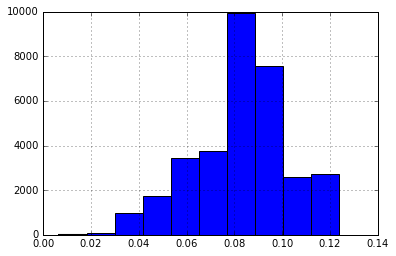

In [52]:
df.redshift.hist()

In [164]:
query = \
"""SELECT g.redshift, count(*)
FROM
(Select top 1000000 redshift // 0.1 as num from galaxy) g
group by g.redshift
ORDER BY redshift"""

In [177]:
query = """SELECT g.bin COUNT(*) (SELECT top 1000 FLOOR(redshift/0.1) as bin from galaxy) g GROUP BY g.bin"""
db.execute(query)
ss = db.fetchall()

ProgrammingError: (102, "Incorrect syntax near '*'.DB-Lib error message 20018, severity 15:\nGeneral SQL Server error: Check messages from the SQL Server\nDB-Lib error message 20018, severity 15:\nGeneral SQL Server error: Check messages from the SQL Server\n")

In [174]:
ss

[(0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 

In [ ]:
fig, ax = plt.subplots()
ax.axhline(2.)